# Irish population age dynamics analysis

This analysis explores the dynamics of the Irish population age distribution from 2020 to 2024. By examining the breakdown of population by age groups and gender, we aim to identify key trends and patterns over time.

In [2]:
# Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the CSV file
file_path = "C:\\Users\\franc\\OneDrive\\Desktop\\Irish_age_data_2020-2024.csv"
df = pd.read_csv(file_path)

In [4]:
# Give a first look to the data
print(df.head())

                           STATISTIC Label  Year      Age Group     Sex  \
0  Population Estimates (Persons in April)  2020   0 - 14 years    Male   
1  Population Estimates (Persons in April)  2020   0 - 14 years  Female   
2  Population Estimates (Persons in April)  2020  10 - 14 years    Male   
3  Population Estimates (Persons in April)  2020  10 - 14 years  Female   
4  Population Estimates (Persons in April)  2020  15 - 19 years    Male   

       UNIT  VALUE  
0  Thousand  519.9  
1  Thousand  493.7  
2  Thousand  181.6  
3  Thousand  173.2  
4  Thousand  166.4  


In [5]:
# Checking columns in the dataset
print(df.columns)

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'UNIT', 'VALUE'], dtype='object')


In [6]:
# Checking the types of data we have in the dataset
print(df.dtypes)

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
UNIT                object
VALUE              float64
dtype: object


## Analysis of the age group distribution

The goal of this analysis is to explore how the population is distributed across age groups over time. By visualizing these distributions,  aim to identify overall patterns and changes in the demographic structure, while also providing a clear view of differences between males and females. This step serves as a starting point for understanding the broader demographic trends in Ireland.

In [7]:
# calculation of total population by age group and sex
age_group = df["Age Group"].unique()
male_values = df[df["Sex"] == "Male"].groupby("Age Group")["VALUE"].sum()
female_values = df[df["Sex"] == "Female"].groupby("Age Group")["VALUE"].sum()
print(male_values, female_values)

Age Group
0 - 14 years         2587.1
10 - 14 years         948.0
15 - 19 years         871.0
20 - 24 years         801.5
25 - 29 years         760.6
30 - 34 years         813.1
35 - 39 years         922.4
40 - 44 years        1008.9
45 - 49 years         931.6
50 - 54 years         852.9
55 - 59 years         763.5
60 - 64 years         682.5
65 - 69 years         590.5
70 - 74 years         498.2
75 - 79 years         369.3
80 - 84 years         220.9
85 years and over     156.7
Name: VALUE, dtype: float64 Age Group
0 - 14 years         2470.4
10 - 14 years         906.8
15 - 19 years         831.5
20 - 24 years         772.3
25 - 29 years         758.4
30 - 34 years         861.6
35 - 39 years        1003.6
40 - 44 years        1066.5
45 - 49 years         951.6
50 - 54 years         858.8
55 - 59 years         782.1
60 - 64 years         703.9
65 - 69 years         609.1
70 - 74 years         520.4
75 - 79 years         402.6
80 - 84 years         267.6
85 years and over     259.1


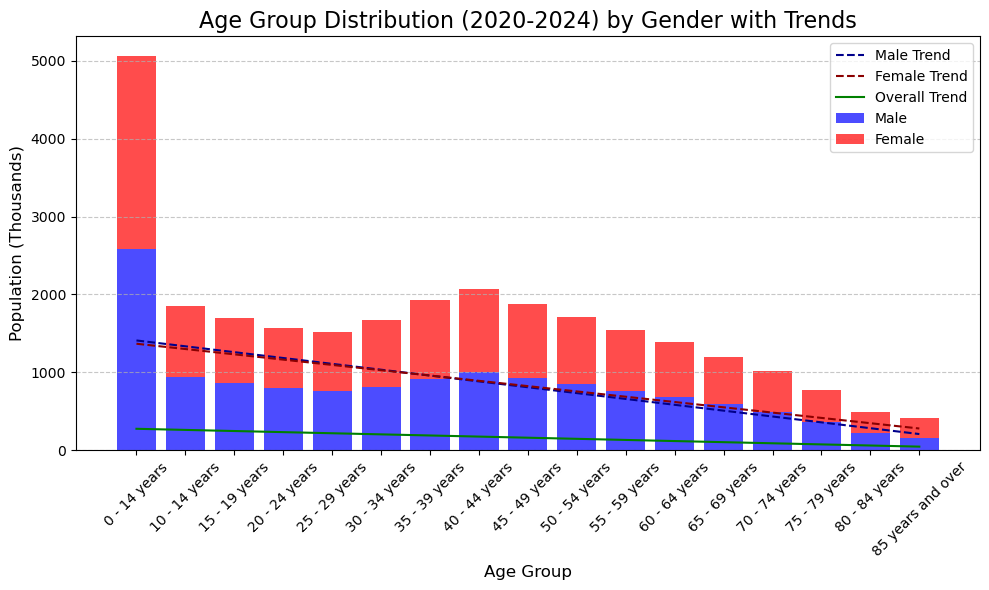

In [8]:
# Let's create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_group, male_values, label="Male", color="blue", alpha=0.7)
plt.bar(age_group, female_values, bottom=male_values, label="Female", color="red", alpha=0.7)

# Let's create some trend lines per gender
male_trend = np.poly1d(np.polyfit(range(len(age_group)), male_values, 1))(range(len(age_group)))
female_trend = np.poly1d(np.polyfit(range(len(age_group)), female_values, 1))(range(len(age_group)))

plt.plot(age_group, male_trend, color="darkblue", linestyle="--", label="Male Trend")
plt.plot(age_group, female_trend, color="darkred", linestyle="--", label="Female Trend")

# Let's also draw a general trend line
overall_mean_values = df.groupby("Age Group")["VALUE"].mean()
overall_trend = np.poly1d(np.polyfit(range(len(age_group)), overall_mean_values, 1))(range(len(age_group)))

plt.plot(age_group, overall_trend, color="green", linestyle="-", label="Overall Trend")

# Personalization of the graph
plt.title("Age Group Distribution (2020-2024) by Gender with Trends", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Population (Thousands)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Detailed breakdown of age group distribution by year and gented with scatter plots

The scatterplots provide a detailed breakdown of the age distribution for each year from 2020 to 2024, highlighting the gender-based composition within each age group. These visualizations allow for a clearer understanding of yearly variations and demographic trends.

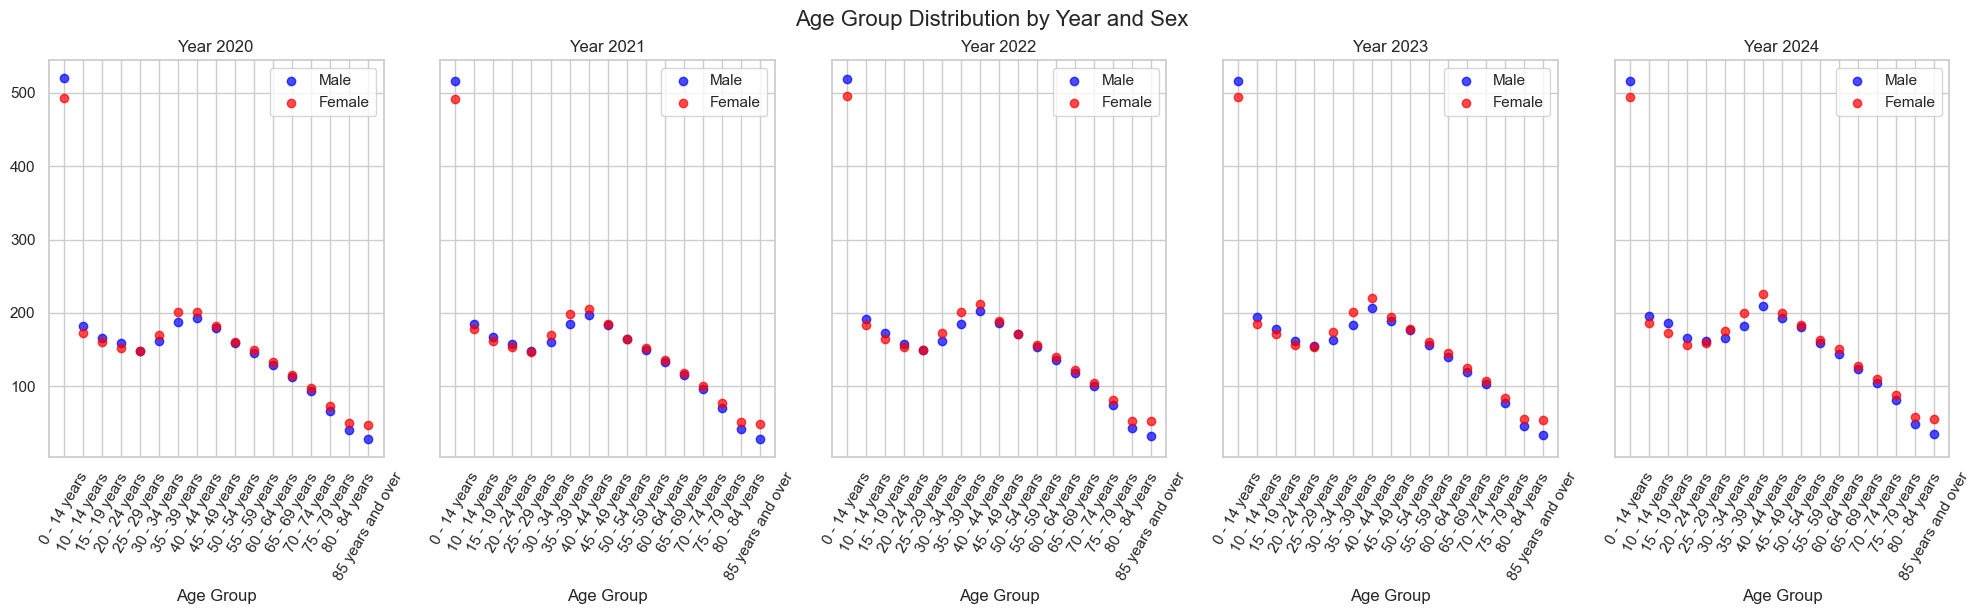

In [9]:
# Configuration of the style of the plot
sns.set(style="whitegrid")
years = df["Year"].unique()

# Definition of colors by gender
colors = {"Male": "blue", "Female": "red"}

# Creation of subplots
fig, axes = plt.subplots(1, len(years), figsize=(20, 6), sharey=True)
for i, year in enumerate(years):
    ax = axes[i] if len(years) > 1 else axes  # Support for a single plot
    # Filter data for specific year
    year_data = df[df["Year"] == year]
    # Scatter plot divided by gender
    for sex in year_data["Sex"].unique():
        sex_data = year_data[year_data["Sex"] == sex]
        ax.scatter(
            sex_data["Age Group"],
            sex_data["VALUE"],
            label=sex,
            color=colors[sex],
            alpha=0.7
        )
    # Set title and labels for each subplot
    ax.set_title(f"Year {year}")
    ax.set_xlabel("Age Group")
    ax.legend()
    ax.tick_params(axis="x", rotation=60)

# Adjusting layout for better visualization
plt.tight_layout()
plt.suptitle("Age Group Distribution by Year and Sex", fontsize=16, y=1.02)
plt.show()

## Gender Balance Analysis
This part of the analysis aims to explore gender distribution across various age groups over time, focusing on the comparison between male and female populations. By calculating male-to-female ratios for each age group and visualizing the disparities through bar plots or stacked bar charts, we can identify trends and patterns that shed light on demographic dynamics and potential imbalances.

In [29]:
# Upload CSV file
sex_ratios_ie = pd.read_csv("C:\\Users\\franc\\OneDrive\\Desktop\\Irish_age_data_2020-2024.csv")

# Clean up the "Age Group" column to remove "Year" and leave only the age range (e.g., "35-44")
sex_ratios_ie["Age Group"] = sex_ratios_ie["Age Group"].str.replace('years', '', regex=False).str.strip()

# Verifity how it was transformed
print(sex_ratios_ie["Age Group"].head())

0     0 - 14
1     0 - 14
2    10 - 14
3    10 - 14
4    15 - 19
Name: Age Group, dtype: object


In [30]:
# Group the data by "years", "Age Group", and "Sex", and calculate the sum of values
grouped = sex_ratios_ie.groupby(["Year", "Age Group", "Sex"])["VALUE"].sum().reset_index()

# Use pivot to separate data for "Male" and "Female"
pivoted = grouped.pivot_table(index=['Year', 'Age Group'], columns='Sex', values='VALUE', aggfunc='sum')

# Calculate the Male-to-Female ratio
pivoted['Male-to-Female Ratio'] = pivoted['Male'] / pivoted['Female']

# Reset the index to be able to perform the merge
pivoted = pivoted.reset_index()

# Perform a left join to include all combinations of "years" and "Age Group"
sex_ratios_ie = pd.merge(sex_ratios_ie, pivoted[['Year', 'Age Group', 'Male-to-Female Ratio']],
                         on=['Year', 'Age Group'], how='left')

# Display the result to verify all age groups and Male-to-Female Ratio
# Show the first 100 rows (adjust this number if needed)
print(sex_ratios_ie[['Year', 'Age Group', 'Sex', 'Male-to-Female Ratio']].dropna().head(100))

    Year Age Group     Sex  Male-to-Female Ratio
0   2020    0 - 14    Male              1.053069
1   2020    0 - 14  Female              1.053069
2   2020   10 - 14    Male              1.048499
3   2020   10 - 14  Female              1.048499
4   2020   15 - 19    Male              1.033540
..   ...       ...     ...                   ...
95  2022   70 - 74  Female              0.958852
96  2022   75 - 79    Male              0.915946
97  2022   75 - 79  Female              0.915946
98  2022   80 - 84    Male              0.824528
99  2022   80 - 84  Female              0.824528

[100 rows x 4 columns]


In [25]:
# Check columns
print(sex_ratios_ie.columns)

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'UNIT', 'VALUE',
       'Male-to-Female Ratio'],
      dtype='object')


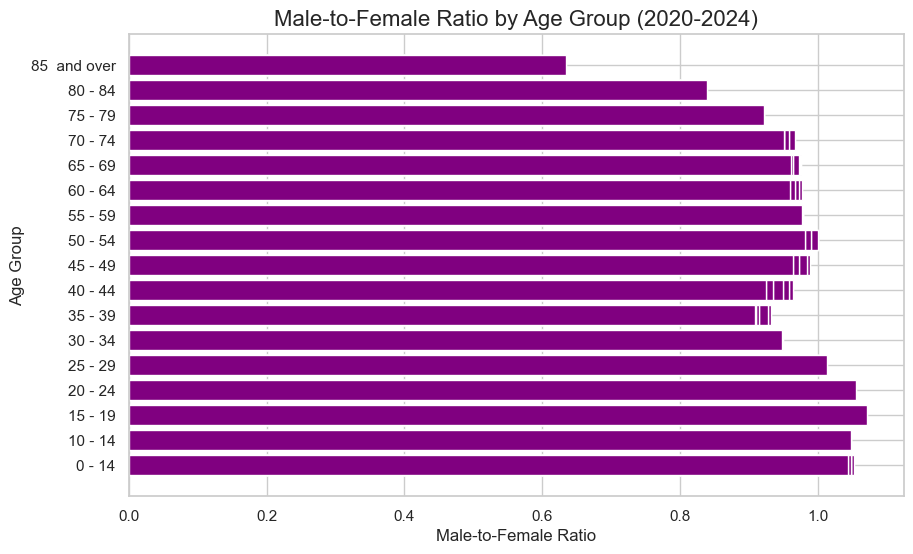

In [26]:
# Build a bar chart to show gender disparities
# Plot a pyramid graph to show Male-to-Female Ratio
plt.figure(figsize=(10, 6))

# Create the plot
plt.barh(sex_ratios_ie['Age Group'], sex_ratios_ie["Male-to-Female Ratio"], color='purple')

# Adjusting titles and legend
plt.title('Male-to-Female Ratio by Age Group (2020-2024)', fontsize=16)
plt.xlabel('Male-to-Female Ratio', fontsize=12)
plt.ylabel('Age Group', fontsize=12)

plt.show()

## Analysis of the Evolution of Mean Age

The goal of this section of the analysis is to explore how the mean age of the population in Ireland evolves from 2020 to 2024, providing insights into the aging trends of the population.

In [32]:
# Define the custom age group centers based on the groups you provided
# I define age groups + the centers manually in order to follow the mean age formula
age_group_centers = {
    '0 - 14 years': 7, '10 - 14 years': 12, '15 - 19 years': 17, '20 - 24 years': 22,
    '25 - 29 years': 27, '30 - 34 years': 32, '35 - 39 years': 37, '40 - 44 years': 42,
    '45 - 49 years': 47, '50 - 54 years': 52, '55 - 59 years': 57, '60 - 64 years': 62,
    '65 - 69 years': 67, '70 - 74 years': 72, '75 - 79 years': 77, '80 - 84 years': 82,
    '85 years and over': 87  # Representing 85 and over as 87
}

In [34]:
# I re-load the CSV file
file_path = "C:\\Users\\franc\\OneDrive\\Desktop\\Irish_age_data_2020-2024.csv"
population_data = pd.read_csv(file_path)

In [36]:
# Apply the mapping to create a new column called "Age Center"
population_data["Age Center"] = population_data["Age Group"].map(age_group_centers)

In [37]:
# Check the first few rows to ensure the new column has been added correctly
print(population_data[["Age Group", "Age Center"]].head())

       Age Group  Age Center
0   0 - 14 years           7
1   0 - 14 years           7
2  10 - 14 years          12
3  10 - 14 years          12
4  15 - 19 years          17


In [38]:
# Calculate the weighted age for each record
population_data["Weighted Age"] = population_data["VALUE"] * population_data["Age Center"]
print(population_data)

                             STATISTIC Label  Year          Age Group     Sex  \
0    Population Estimates (Persons in April)  2020       0 - 14 years    Male   
1    Population Estimates (Persons in April)  2020       0 - 14 years  Female   
2    Population Estimates (Persons in April)  2020      10 - 14 years    Male   
3    Population Estimates (Persons in April)  2020      10 - 14 years  Female   
4    Population Estimates (Persons in April)  2020      15 - 19 years    Male   
..                                       ...   ...                ...     ...   
165  Population Estimates (Persons in April)  2024      75 - 79 years  Female   
166  Population Estimates (Persons in April)  2024      80 - 84 years    Male   
167  Population Estimates (Persons in April)  2024      80 - 84 years  Female   
168  Population Estimates (Persons in April)  2024  85 years and over    Male   
169  Population Estimates (Persons in April)  2024  85 years and over  Female   

         UNIT  VALUE  Age C

In [39]:
# Calculate weighted mean age using groupby and agg
age_mean_by_year = (
    population_data
    .groupby('Year')
    .agg(Mean_Age=('Weighted Age', lambda x: x.sum() / population_data.loc[x.index, 'VALUE'].sum()))
    .reset_index()
)
# Print results
print(age_mean_by_year)

   Year   Mean_Age
0  2020  36.026780
1  2021  36.267683
2  2022  36.517594
3  2023  36.736596
4  2024  36.969543


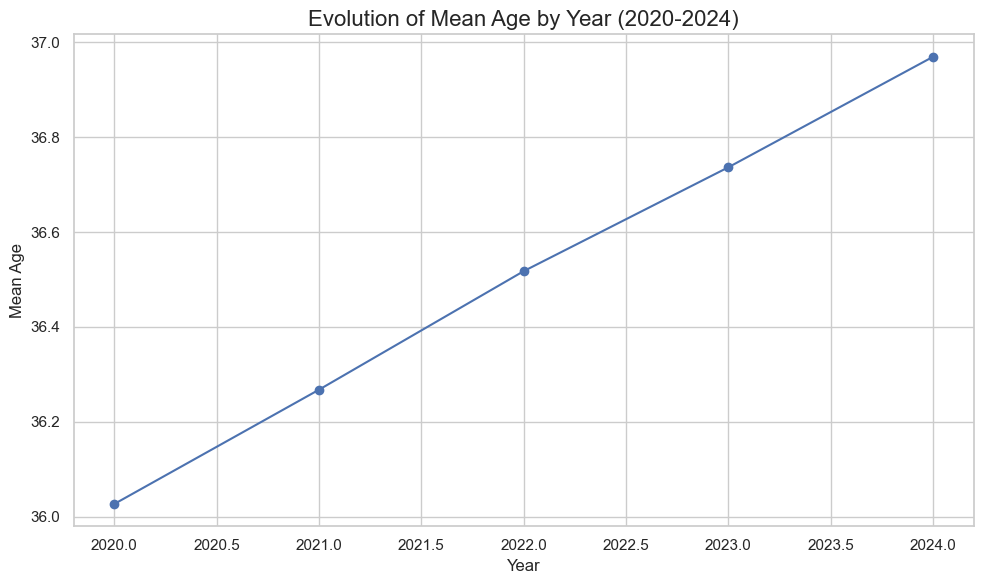

In [41]:
# Plot the evolution of the mean age
plt.figure(figsize=(10, 6))
plt.plot(age_mean_by_year['Year'], age_mean_by_year['Mean_Age'], marker='o', linestyle='-', color='b')
plt.title('Evolution of Mean Age by Year (2020-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Age', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## Standard Deviation Calculation

Standard deviation is a key statistical measure used to quantify the amount of dispersion in a dataset. In this section of the analysis, I calculated the standard deviation of population metrics across different age groups to understand the consistency of population distribution over time. 

A lower standard deviation indicates that the population is more evenly distributed, while a higher standard deviation highlights significant fluctuations. 

In [47]:
# Calculte standard deviation
# Since I already have created an array with the age group centers in order to calculate the mean
# I can extract the values from that array

ages = np.array(list(age_group_centers.values()))

In [48]:
# Now I calculate the standard deviations
standard_deviation = np.std(ages)
print("Standard Deviation:",ages)

Standard Deviation: [ 7 12 17 22 27 32 37 42 47 52 57 62 67 72 77 82 87]


## Demographic Projection Analysis

Demographic projection analysis involves forecasting future population trends based on historical data. By examining key factors such as age groups, gender distribution, and other demographic variables, we can gain insights into how populations are likely to evolve over time.

In this analysis, I focus on projecting population dynamics across different age groups for the years 2025 and 2030. These projections provide valuable foresight into potential demographic shifts, offering a clearer understanding of future population changes and their impact on society.

In [ ]:
# Import sklern to calculate linear regression for projection analysis
# And to train the model
from sklearn.linear_model import 

In [51]:
# I extract all unique age groups
age_groups = df['Age Group'].unique()

In [54]:
# Projection for each age group
# Prepare the dictionary
predictions = {}

for age_group in age_groups:
    # Filter for each age group
    group_data = df[df['Age Group'] == age_group]

    # Extract years and values of the population
    years = group_data['Year'].values.reshape(-1, 1)
    population = group_data['VALUE'].values

    # Linear regression model
    model = LinearRegression()
    model.fit(years, population)

    # Projection for 2025 and 2030
    future_years = np.array([2025, 2026]).reshape(-1, 1)
    future_predictions = model.predict(future_years)

    # Memorize projections
    predictions[age_group] = {
        "2025": future_predictions[0],
        "2030": future_predictions[1]
    }

# Print projection for each age group
for age_group, projection in predictions.items():
    print(f"Projecyion for {age_group}:")
    print(f"Year 2025: {projection['2025']}")
    print(f"Year 2030: {projection['2030']}")
    print()  # Added an empty line to separate each group projections

Projecyion for 0 - 14 years:
Year 2025: 505.39
Year 2030: 505.27

Projecyion for 10 - 14 years:
Year 2025: 195.84500000000025
Year 2030: 199.30000000000018

Projecyion for 15 - 19 years:
Year 2025: 182.79000000000087
Year 2030: 186.97000000000116

Projecyion for 20 - 24 years:
Year 2025: 161.8499999999999
Year 2030: 163.3399999999997

Projecyion for 25 - 29 years:
Year 2025: 161.09499999999935
Year 2030: 164.15999999999894

Projecyion for 30 - 34 years:
Year 2025: 171.39999999999964
Year 2030: 172.70999999999958

Projecyion for 35 - 39 years:
Year 2025: 190.75499999999988
Year 2030: 190.13999999999987

Projecyion for 40 - 44 years:
Year 2025: 223.36499999999978
Year 2030: 228.64000000000124

Projecyion for 45 - 49 years:
Year 2025: 199.76499999999942
Year 2030: 203.57999999999902

Projecyion for 50 - 54 years:
Year 2025: 188.46500000000015
Year 2030: 194.22999999999956

Projecyion for 55 - 59 years:
Year 2025: 164.7450000000008
Year 2030: 168.14000000000124

Projecyion for 60 - 64 year

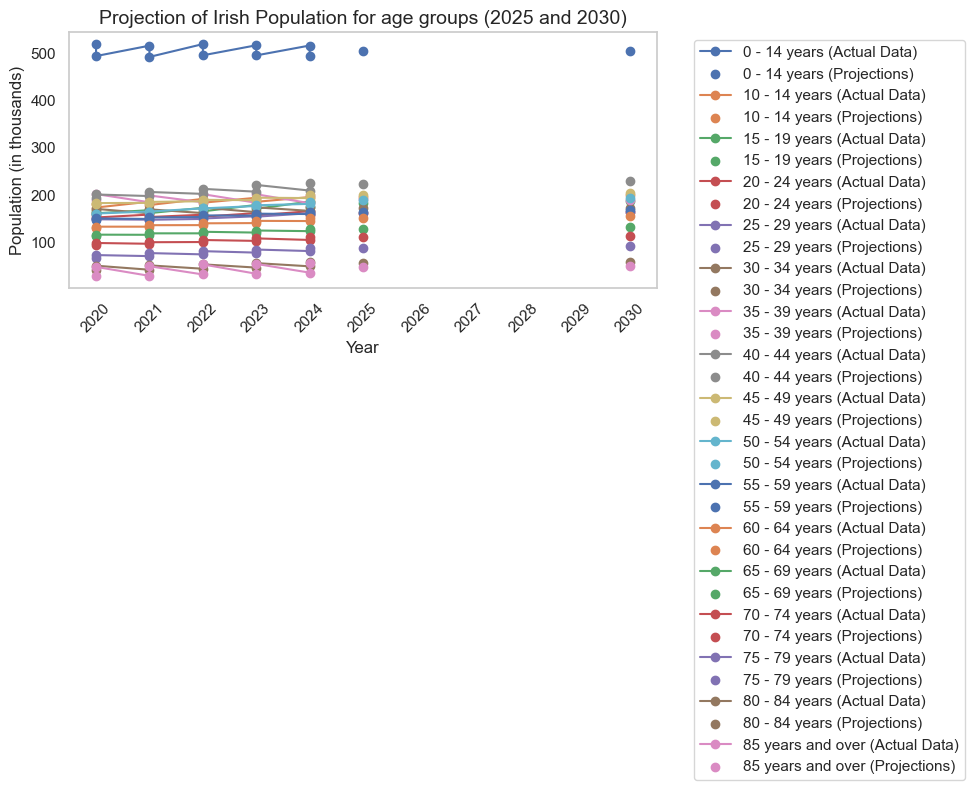

In [58]:
# Plot projections
plt.figure(figsize=(10, 6))

# Draw lines and points for each age group
for age_group in df['Age Group'].unique():
    group_data = df[df['Age Group'] == age_group]
    actual_years = group_data['Year'].values
    actual_values = group_data['VALUE'].values

    # Plot actual data
    plt.plot(actual_years, actual_values, marker='o', label=f"{age_group} (Actual Data)")
    
    #Plot projections
    plt.scatter(
        [2025, 2030],
        [predictions[age_group]["2025"], predictions[age_group]["2030"]],
        label=f"{age_group} (Projections)"
    )

plt.title("Projection of Irish Population for age groups (2025 and 2030)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population (in thousands)", fontsize=12)
plt.xticks(range(2020, 2031), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()